# Solving ODEs

Let's look at analytical and numerical solutions to a first-order ODE, describing radioactive decay:

$$ \frac{\mathrm{d}N}{\mathrm{d}t} = -\lambda N(t) $$

where $N$ is the number of atoms at a given time $t$ and $\lambda$ is the decay constant.

The challenge here is to find the function $N(t)$, given that we know its derivative. (This is akin to finding the positive of a bicycle, given that you know its speed as a function of time.)

## Analytical solution using SymPy

In [2]:
from sympy import symbols, Function, Eq

λ, t = symbols('lambda t')
N = Function('N')(t)

N

N(t)

Set up the ODE:

In [3]:
eqn = Eq(N.diff(t), -λ*N)
eqn

Eq(Derivative(N(t), t), -lambda*N(t))

Solve it (SymPy will automatically figure out the target function):

In [4]:
from sympy import dsolve

func = dsolve(eqn)
func

Eq(N(t), C1*exp(-lambda*t))

This is the analytical solution. The quantity $C_1$ can be interpreted as the initial condition, i.e. $N_0 = N(t=0)$.

We can do numerical evaluation in SymPy &mdash; [read the docs](https://docs.sympy.org/latest/modules/numeric-computation.html) &mdash; but I think most people would use `scipy`.

## Numerical evaluation

We'll use `odeint`, which seems to be popular. From the docs: 

> Solves a system of ordinary differential equations using lsoda from the FORTRAN library odepack.

In [5]:
from scipy.integrate import odeint

def dN_dt(N, t, λ):
    """
    Provide the derivative.
    """
    return -λ * N

dN_dt(5000, 0, 0.02)

-100.0

In [6]:
import numpy as np

t = np.linspace(0, 100)
N_0 = 5000
N_t = odeint(dN_dt, N_0, t, args=(0.02,))

N_t[:5]

array([[5000.        ],
       [4800.02726332],
       [4608.05229785],
       [4423.75527139],
       [4246.82913054]])

In [7]:
N_t = N_t.ravel()

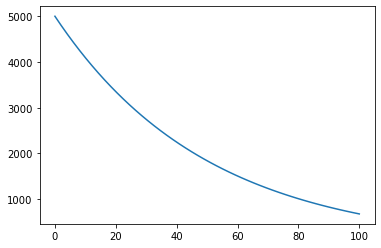

In [8]:
import matplotlib.pyplot as plt

plt.plot(t, N_t)

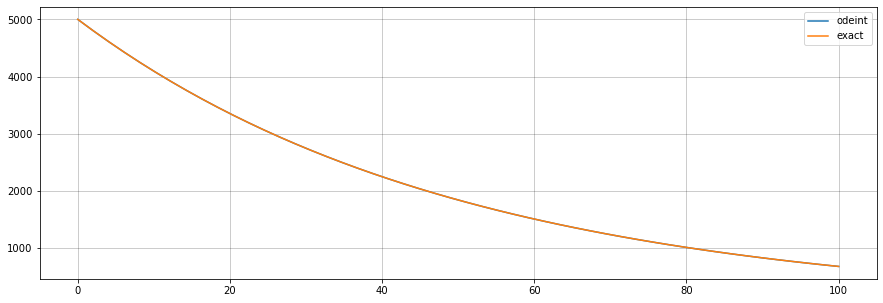

In [12]:
def N(t, N0=5000, k=0.02):
    """Exact solution with initial condition N0."""
    return N0 * np.exp(-k * t)

plt.figure(figsize=(15, 5))
plt.plot(t, N_t, label='odeint')
plt.plot(t, N(t), label='exact')
plt.grid(color='k', alpha=0.25)
plt.legend()

It looks extremely close, but let's check it against the exact solution:

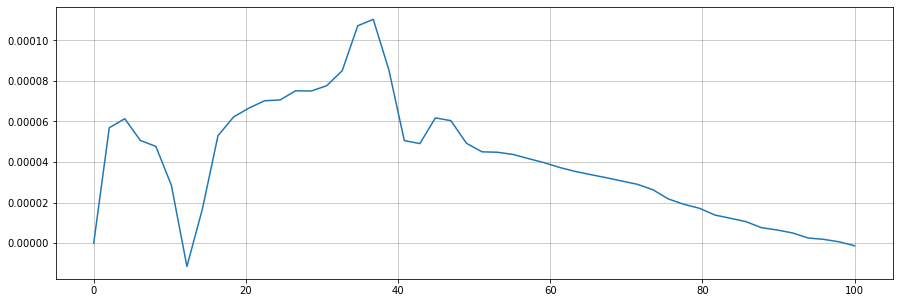

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(t, N_t - N(t))
plt.grid(color='k', alpha=0.25)

## `solve_ivp`

The `odeint` docs suggest using `solve_ivp` instead. The main advantage is that it offers more solvers via the `method` argument. From [the `solve_ivp` docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html):

- `'RK45'` (default): Explicit Runge-Kutta method of order 5(4).
- `'RK23'`: Explicit Runge-Kutta method of order 3(2) [3].
- `'DOP853'`: Explicit Runge-Kutta method of order 8 [13].
- `'Radau'`: Implicit Runge-Kutta method of the Radau IIA family of order 5.
- `'BDF'`: Implicit multi-step variable-order (1 to 5) method based on a backward differentiation formula for the derivative approximation.
- `'LSODA'`: Adams/BDF method with automatic stiffness detection and switching (wraps ODEPACK).

**Note: The order of the arguments in the derivative equation is the opposite of `odeint`.**

In [31]:
from scipy.integrate import solve_ivp

def dN_dt(t, N, λ):
    """
    Provide the derivative... again. Annoyingly, solve_ivp wants t first, then f(t).
    """
    return -λ * N

solution = solve_ivp(dN_dt, method='Radau', t_span=(0, 100), t_eval=t, y0=[5000], args=(0.02,))

solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 53
     njev: 2
      nlu: 8
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   2.04081633,   4.08163265,   6.12244898,
         8.16326531,  10.20408163,  12.24489796,  14.28571429,
        16.32653061,  18.36734694,  20.40816327,  22.44897959,
        24.48979592,  26.53061224,  28.57142857,  30.6122449 ,
        32.65306122,  34.69387755,  36.73469388,  38.7755102 ,
        40.81632653,  42.85714286,  44.89795918,  46.93877551,
        48.97959184,  51.02040816,  53.06122449,  55.10204082,
        57.14285714,  59.18367347,  61.2244898 ,  63.26530612,
        65.30612245,  67.34693878,  69.3877551 ,  71.42857143,
        73.46938776,  75.51020408,  77.55102041,  79.59183673,
        81.63265306,  83.67346939,  85.71428571,  87.75510204,
        89.79591837,  91.83673469,  93.87755102,  95.91836735,
        97.95918367, 100.        ])
 t_events: None
        y: arr

In [32]:
N_t = solution.y.ravel()

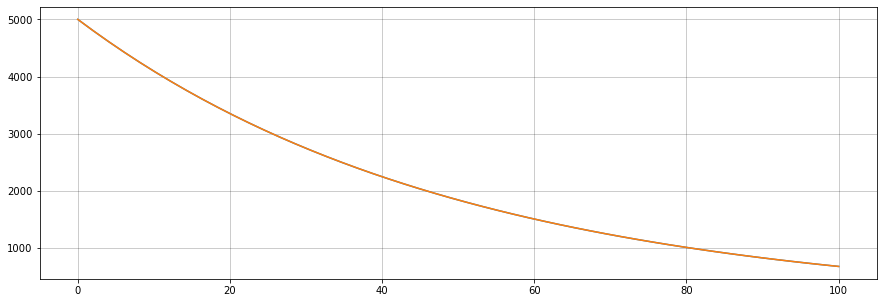

In [33]:
plt.figure(figsize=(15, 5))
plt.plot(t, N_t)
plt.plot(t, N(t))
plt.grid(color='k', alpha=0.25)

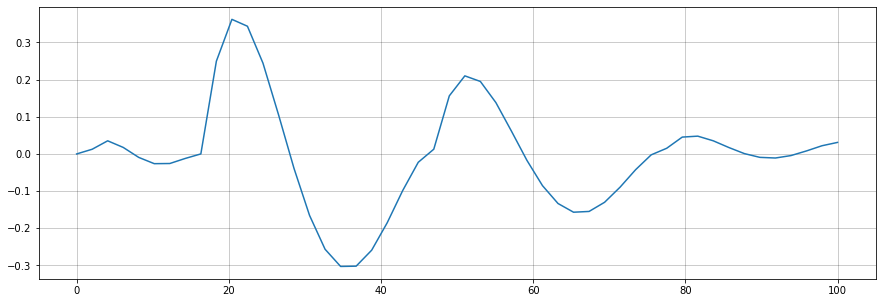

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(t, N_t - N(t))
plt.grid(color='k', alpha=0.25)

Surprisingly, this is quite a bit worse than the `odeint` result.

---

&copy; 2020 Agile Scientific, licenced CC-BY.